In [1]:
#IMPORTING LIBRARIES FOR WEBSCRAPING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

from datetime import datetime

In [2]:
#STORE URL IN VARIABLE
url = 'https://weather.com/en-TT/weather/tenday/l/dacc1a69bdf8d98b9252165a15b555f0f04ad1c900845b576de8d50ad25f451a'

#GET REQUESTS
r = requests.get(url)

#SOUP OBJECT
soup=BeautifulSoup(r.content, 'html.parser')

In [3]:
print(soup.title.text.strip())

Misamis Oriental, Philippines 10-Day Weather Forecast - The Weather Channel | Weather.com


<!DOCTYPE html>
<html dir="ltr" lang="en-TT"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Be prepared with the most accurate 10-day forecast for Misamis Oriental, Philippines with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="Misamis Oriental, Philippines 10-Day Weather Forecast - The Wea
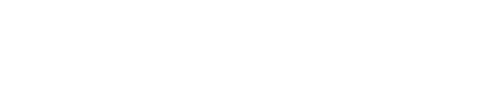
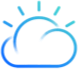

In [4]:
#DISPLAY SOUP
soup

In [5]:
#DISPLAY SOUP TITLE
soup.title.text

'Misamis Oriental, Philippines 10-Day Weather Forecast - The Weather Channel | Weather.com'

In [6]:
#FIND class_="DailyForecast--DisclosureList--msYIJ"
results = soup.find("div", {"class":"DailyForecast--DisclosureList--msYIJ"})

print(results)

<div class="DailyForecast--DisclosureList--msYIJ"><details class="Disclosure--themeList--25Q0H" data-testid="ExpandedDetailsCard" data-track-string="false" id="detailIndex0" open=""><summary aria-expanded="true" class="Disclosure--Summary--UuybP DaypartDetails--Summary--3IBUr Disclosure--positionShowOpenSummaryContainer--Qou6d Disclosure--hideBorderOnSummaryOpen--ZdSDc" role="button"><div class="DaypartDetails--DetailSummaryContent--3uxcj Disclosure--SummaryDefault--3xAWB Disclosure--positionShowOpenSummary--C1hiI"><div class="Accessibility--visuallyHidden--2uGW3"><div class="DetailsSummary--DetailsSummary--2HluQ DetailsSummary--fadeOnOpen--vFCc_" data-testid="DetailsSummary" id="titleIndex0"><h2 class="DetailsSummary--daypartName--2FBp2" data-testid="daypartName">Tonight</h2><div class="DetailsSummary--temperature--1Syw3" data-testid="detailsTemperature"><span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">--</span><span data-testid="lowTempValue">/<span c

In [7]:
#DISPLAY DATE, TEMPERATURE, WEATHER, CHANCE OF RAIN, WIND DIRECTION & SPEED, AND DETAILS

print("\n")
print(soup.title.text.strip(),"\n")

date_df=[]
temp_df=[]
uv_df=[]
hum_df=[]
weather_df=[]
rain_df=[]
wind_df=[]
details_df=[]

for result in results:
    
    date = result.find("h2",{"class":"DetailsSummary--daypartName--2FBp2"})
    temp = result.find("div",{"class":"DetailsSummary--temperature--1Syw3"})
    uv = result.find("span",{"data-testid":"UVIndexValue"})
    hum = result.find("span",{"class":"DetailsTable--value--1q_qD"})
    weather = result.find("span",{"class":"DetailsSummary--extendedData--365A_"})
    rain = result.find("span",{"class":"DailyContent--value--37sk2"})
    wind = result.find("span",{"class":"Wind--windWrapper--3aqXJ undefined"})
    details = result.find("p",{"class":"DailyContent--narrative--hplRl"})
    
    date_df.append(date.text.strip())
    temp_df.append(temp.text.strip())
    uv_df.append(uv.text.strip())
    hum_df.append(hum.text.strip())
    weather_df.append(weather.text.strip())
    rain_df.append(rain.text.strip())
    wind_df.append(wind.text.strip())
    details_df.append(details.text.strip())
    
    
    print("Date: ",date.text.strip())
    print("Temperature: ",temp.text.strip())
    print("UV Index: ",uv.text.strip())
    print("Humidity: ",hum.text.strip())
    print("Weather: ",weather.text.strip())
    print("Chance of Rain: ",rain.text.strip())
    print("Wind Direction & Speed: ",wind.text.strip())
    print("Details: ",details.text.strip())
    print("-"*120,"\n")



Misamis Oriental, Philippines 10-Day Weather Forecast - The Weather Channel | Weather.com 

Date:  Tonight
Temperature:  --/10°
UV Index:  0 of 10
Humidity:  83%
Weather:  Partly Cloudy
Chance of Rain:  6%
Wind Direction & Speed:  ESE 6 km/h
Details:  Partly cloudy. Low 10ºC. Winds ESE and variable.
------------------------------------------------------------------------------------------------------------------------ 

Date:  Fri 21
Temperature:  19°/10°
UV Index:  Extreme
Humidity:  70%
Weather:  PM T-Storms
Chance of Rain:  42%
Wind Direction & Speed:  NE 12 km/h
Details:  Thunderstorms developing in the afternoon. High 19ºC. Winds NE at 10 to 15 km/h. Chance of rain 40%.
------------------------------------------------------------------------------------------------------------------------ 

Date:  Sat 22
Temperature:  18°/11°
UV Index:  8 of 10
Humidity:  73%
Weather:  Showers
Chance of Rain:  51%
Wind Direction & Speed:  NE 11 km/h
Details:  Showers. High 18ºC. Winds NE at 10 t

In [8]:
#TRANSFORMING WEBSCRAPED TO DATAFRAME
webscrape_data = {"Date" : date_df,"Temperature" : temp_df, "UV Index" : uv_df, "Humidity" : hum_df,
                  "Weather" : weather_df, "Chance of Rain" : rain_df, "Wind Direction & Speed" : wind_df,
                 "Details" : details_df}

df = pd.DataFrame(webscrape_data)


#DISPLAY DATAFRAME DETAILS
print(df.head(),"\n")
print("-"*120,"\n")
print(df.info())

      Date Temperature UV Index Humidity        Weather Chance of Rain  \
0  Tonight      --/10°  0 of 10      83%  Partly Cloudy             6%   
1   Fri 21     19°/10°  Extreme      70%    PM T-Storms            42%   
2   Sat 22     18°/11°  8 of 10      73%        Showers            51%   
3   Sun 23     17°/11°  8 of 10      78%       T-Storms            81%   
4   Mon 24     16°/11°  6 of 10      85%       T-Storms            97%   

  Wind Direction & Speed                                            Details  
0             ESE 6 km/h   Partly cloudy. Low 10ºC. Winds ESE and variable.  
1             NE 12 km/h  Thunderstorms developing in the afternoon. Hig...  
2             NE 11 km/h  Showers. High 18ºC. Winds NE at 10 to 15 km/h....  
3             NE 12 km/h  Thunderstorms. High 17ºC. Winds NE at 10 to 15...  
4            NNE 11 km/h  Thunderstorms. High 16ºC. Winds NNE at 10 to 1...   

-------------------------------------------------------------------------------------

In [9]:
# This will print all content of columns and rows
pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth',1)


#CONVERTING "Today" value to date now
df.loc[0,"Date"] = datetime.now().strftime("%a %d")

df.head()

,Date,Temperature,UV Index,Humidity,Weather,Chance of Rain,Wind Direction & Speed,Details
0,Thu 20,--/10°,0 of 10,83%,Partly Cloudy,6%,ESE 6 km/h,Partly cloudy. Low 10ºC. Winds ESE and variable.
1,Fri 21,19°/10°,Extreme,70%,PM T-Storms,42%,NE 12 km/h,Thunderstorms developing in the afternoon. High 19ºC. Winds NE at 10 to 15 km/h. Chance of rain 40%.
2,Sat 22,18°/11°,8 of 10,73%,Showers,51%,NE 11 km/h,Showers. High 18ºC. Winds NE at 10 to 15 km/h. Chance of rain 50%.
3,Sun 23,17°/11°,8 of 10,78%,T-Storms,81%,NE 12 km/h,Thunderstorms. High 17ºC. Winds NE at 10 to 15 km/h. Chance of rain 80%.
4,Mon 24,16°/11°,6 of 10,85%,T-Storms,97%,NNE 11 km/h,Thunderstorms. High 16ºC. Winds NNE at 10 to 15 km/h. Chance of rain 100%.


In [10]:
#DISPLAY WEATHER DATAFRAME

print("\n")
print(soup.title.text.strip())

df



Misamis Oriental, Philippines 10-Day Weather Forecast - The Weather Channel | Weather.com


,Date,Temperature,UV Index,Humidity,Weather,Chance of Rain,Wind Direction & Speed,Details
0,Thu 20,--/10°,0 of 10,83%,Partly Cloudy,6%,ESE 6 km/h,Partly cloudy. Low 10ºC. Winds ESE and variable.
1,Fri 21,19°/10°,Extreme,70%,PM T-Storms,42%,NE 12 km/h,Thunderstorms developing in the afternoon. High 19ºC. Winds NE at 10 to 15 km/h. Chance of rain 40%.
2,Sat 22,18°/11°,8 of 10,73%,Showers,51%,NE 11 km/h,Showers. High 18ºC. Winds NE at 10 to 15 km/h. Chance of rain 50%.
3,Sun 23,17°/11°,8 of 10,78%,T-Storms,81%,NE 12 km/h,Thunderstorms. High 17ºC. Winds NE at 10 to 15 km/h. Chance of rain 80%.
4,Mon 24,16°/11°,6 of 10,85%,T-Storms,97%,NNE 11 km/h,Thunderstorms. High 16ºC. Winds NNE at 10 to 15 km/h. Chance of rain 100%.
5,Tue 25,17°/11°,6 of 10,83%,T-Storms,88%,NE 12 km/h,Thunderstorms. High 17ºC. Winds NE at 10 to 15 km/h. Chance of rain 90%.
6,Wed 26,19°/12°,10 of 10,78%,T-Storms,69%,ENE 12 km/h,Thunderstorms. High 19ºC. Winds ENE at 10 to 15 km/h. Chance of rain 70%.
7,Thu 27,19°/12°,Extreme,75%,T-Storms,68%,NE 12 km/h,Thunderstorms. High 19ºC. Winds NE at 10 to 15 km/h. Chance of rain 70%.
8,Fri 28,18°/11°,10 of 10,76%,T-Storms,60%,NE 12 km/h,Thunderstorms. High 18ºC. Winds NE at 10 to 15 km/h. Chance of rain 60%.
9,Sat 29,18°/11°,Extreme,76%,T-Storms,60%,NE 12 km/h,Thunderstorms. High 18ºC. Winds NE at 10 to 15 km/h. Chance of rain 60%.
